## Dataset and code is from Python for Data Analysis by Wes McKinney

In [5]:
import pandas as pd
import numpy as np
import os
import platform
import glob
import re

In [7]:
path = os.getcwd()
filenames = glob.glob(path + "/*.txt")

li = []

df = None
for filename in filenames:
    columns=['name', 'sex', 'births']
    temp_df = pd.read_csv(filename, names=columns)
    if platform.system() != 'Windows':
        year = re.findall(r'\d+', filename.split('/')[-1])[0]
    else:
        year = re.findall(r'\d+', filename.split('\\')[-1])[0]
    temp_df['year'] = year
    li.append(temp_df)

if (li):
    df = pd.concat(li, axis=0, ignore_index=True)

df.year = df.year.astype('float').astype('Int64')
df = df.sort_values('year').reset_index(drop=True).copy()
df

,name,sex,births,year
0,Elijah,M,100,1880
1,Howard,M,357,1880
2,Martin,M,357,1880
3,Michael,M,354,1880
4,Bert,M,348,1880
...,...,...,...,...
1690779,Donyae,F,8,2010
1690780,Donica,F,8,2010
1690781,Domino,F,8,2010
1690782,Edythe,F,8,2010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 53.2+ MB


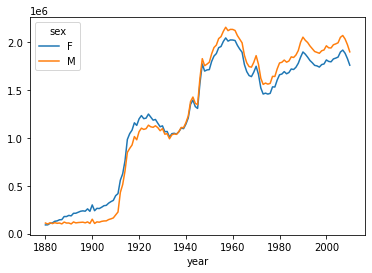

In [9]:
new_df = df.pivot_table(values='births', index='year', columns='sex', aggfunc=sum)
new_df.plot();

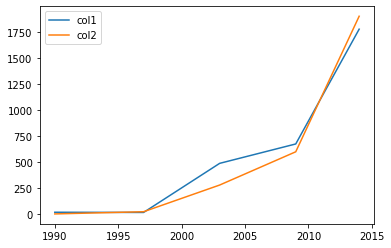

In [10]:
df2 = pd.DataFrame({
    'col1': [20, 18, 489, 675, 1776],
    'col2': [4, 25, 281, 600, 1900]
    }, index=[1990, 1997, 2003, 2009, 2014])
df2.plot.line();